<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-4:-Model-Fitting" data-toc-modified-id="Part-4:-Model-Fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 4: Model Fitting</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Loading-back-data" data-toc-modified-id="Loading-back-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading back data</a></span></li><li><span><a href="#Prepping-the-data" data-toc-modified-id="Prepping-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Prepping the data</a></span><ul class="toc-item"><li><span><a href="#Splitting-into-target-and-features" data-toc-modified-id="Splitting-into-target-and-features-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Splitting into target and features</a></span></li><li><span><a href="#Train_Test_Split" data-toc-modified-id="Train_Test_Split-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Train_Test_Split</a></span></li></ul></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Training the model</a></span><ul class="toc-item"><li><span><a href="#Word2Vec-Vectorizer" data-toc-modified-id="Word2Vec-Vectorizer-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Word2Vec Vectorizer</a></span></li><li><span><a href="#Setting-up-the-functions" data-toc-modified-id="Setting-up-the-functions-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Setting up the functions</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Baseline</a></span></li></ul></li><li><span><a href="#Results---Best-Model" data-toc-modified-id="Results---Best-Model-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Results - Best Model</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Feature Importances</a></span></li></ul></li><li><span><a href="#Results-&amp;-Analysis" data-toc-modified-id="Results-&amp;-Analysis-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Results &amp; Analysis</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

# Part 4: Model Fitting

## Import Libraries

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import itertools

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve
from sklearn.naive_bayes import BernoulliNB, GaussianNB,  MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

## Loading back data

In [2]:
raw = pd.read_csv("data/transformed_data.csv")

# create a working copy so that we have an untouched version to fall back on
df = raw.copy()

df.head()

,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
0,theremnanthodl,Bitcoin Town - A fiction novel about using Bit...,11,2021-07-22 07:30:06,bitcoin town a fiction novel about using bitco...,"bitcoin, town, fiction, novel, about, using, b...","bitcoin, town, fiction, novel, bitcoin, great,...","bitcoin, town, fiction, novel, bitcoin, great,...",1,75,0
1,ReadDailyCoin,"Crypto Influencers Dorsey, Woods, and Musk Fac...",10,2021-07-22 07:12:50,crypto influencers dorsey woods and musk faceo...,"crypto, influencers, dorsey, woods, and, musk,...","influencers, dorsey, woods, musk, faceoff, bwo...","influencer, dorsey, wood, musk, faceoff, bword...",1,77,0
2,theloiteringlinguist,Elon Musk’s View on Bitcoin (July 21 2021),6,2021-07-22 06:58:57,elon musks view on bitcoin july,"elon, musks, view, on, bitcoin, july","elon, musks, view, bitcoin, july","elon, musk, view, bitcoin, july",1,43,0
3,Electronic_Chard1987,You’ve undoubtedly heard about crypto currenci...,55,2021-07-22 06:49:17,youve undoubtedly heard about crypto currencie...,"you, ve, undoubtedly, heard, about, crypto, cu...","undoubtedly, heard, currencies, bitcoin, ether...","undoubtedly, hear, currency, bitcoin, ethereum...",6,298,0
4,FarEnergy3518,best crypto video ive ever watched,6,2021-07-22 06:49:14,best crypto video ive ever watched,"best, crypto, video, ve, ever, watched","best, video, watched","good, video, watch",1,35,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8167 entries, 0 to 8166
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        8167 non-null   object
 1   text          8167 non-null   object
 2   word_count    8167 non-null   int64 
 3   date          8167 non-null   object
 4   text_no_sym   8167 non-null   object
 5   text_tok      8167 non-null   object
 6   text_no_stop  8167 non-null   object
 7   text_lemma    8167 non-null   object
 8   sent_count    8167 non-null   int64 
 9   char_count    8167 non-null   int64 
 10  is_ethereum   8167 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 702.0+ KB


## Prepping the data

### Splitting into target and features

In [4]:

# Splitting into target and features
COL_NAME = 'text_lemma' 
x = df[[COL_NAME]]

# Negative index means to search from back to front
# -1 means retrieve the last column
y = df.iloc[:, -1].to_frame()
print(x.columns)
print(y.columns)

Index(['text_lemma'], dtype='object')
Index(['is_ethereum'], dtype='object')


### Train_Test_Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=89, shuffle=True, stratify=y)
print(x_train.shape)
print(y_train.shape)

(5716, 1)
(5716, 1)


## Training the model

### Word2Vec Vectorizer

In [6]:
# class W2V_Vectorizer(TransformerMixin,BaseEstimator):
#     def __init__(self, model="en_core_web_lg"):
#         self.model = model

#     def fit(self,X,y=None):
#         return self

#     def transform(self,X):
#         nlp = spacy.load(self.model)
#         return np.concatenate([nlp(' '.join(list(set(doc.split(" "))))).vector.reshape(1,-1) for doc in X])

### Setting up the functions

In [7]:
def plot_confusion_matrix(y_test, test_preds):
    cm = confusion_matrix(y_test, test_preds)
    modified_cm = []
    for index,value in enumerate(cm):
        if index == 0:
            modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
        if index == 1:
            modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

    TN, FP, FN, TP = cm.ravel()

    print("Precison: {:.3f} (TP / (TP + FP))".format(TP / (TP + FP)))
    print("Recall: {:.3f} (TP / (TP + FN))".format(TP / (TP + FN)))
    print("F1 Score: {:.3f} (2*TP / (2*TP + FN + FP))".format(2*TP / (2*TP + FN + FP)), '\n')
    
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=np.array(modified_cm),
                fmt="",
                annot_kws={"size": 10},
                linewidths=.5,
                square = True,
                cmap = 'Blues',
                xticklabels = ['bitcoin', 'ethereum'],
                yticklabels = ['bitcoin', 'ethereum'],
                )

    plt.ylabel('Actual label', fontsize = 10);
    plt.xlabel('Predicted label', fontsize = 10);
    plt.title('Accuracy Score: {:.3f}'.format((TN+TP) / (TN+TP+FN+FP)), size = 12);
    plt.tick_params(labelsize= 8)

    
def plot_roc_curve(model, x_test, y_test):    
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob))   ) 
    
     
# Function to run model -- input vectorizer and model
def run_model(v, m, mod_params={}, grid_search=False):

    # Initial dictionary to hold model results
    results = {}
    
    pipe = models[m]
    vect = vectorizers[v]
    
    x_train_vect = vect.fit_transform(x_train[COL_NAME].values)
    x_test_vect = vect.transform(x_test[COL_NAME].values)
    
    if grid_search:
        # Instantiate list to store gridsearch results
        gs = GridSearchCV(pipe, param_grid=mod_params, cv=3, verbose=0, scoring='accuracy', n_jobs=-1)
        gs.fit(x_train_vect, np.ravel(y_train)) # best estimator is used during .predict()
        pipe = gs
        
    else:
        try:
            pipe.fit(x_train_vect, np.ravel(y_train))
        except:
            return

    auc_scores = cross_val_score(pipe, x_train_vect, np.ravel(y_train),  scoring='roc_auc', cv = 5)
    acc_scores = cross_val_score(pipe, x_train_vect, np.ravel(y_train),  scoring='accuracy', cv = 5)

    # Retrieve metrics
    predictions = pipe.predict(x_test_vect)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    y_test_pred_prob = pipe.predict_proba(x_test_vect)[:,1]
    y_train_pred_prob = pipe.predict_proba(x_train_vect)[:,1]
    
    results['vectorizer'] = v
    results['model'] = m
    
    results['train_auc_cv'] = auc_scores.mean()
    results['test_auc'] = roc_auc_score(y_test, y_test_pred_prob)
    results['auc_diff'] = results['train_auc_cv'] - results['test_auc']
    
    results['precision'] = tp / (tp + fp)                           # % of PREDICTED positives that are CORRECTLY predicted
    results['specificity'] = tn / (tn + fp)                         # % of ACTUAL negatives that are CORRECTLY predicted
    results['recall'] = tp / (tp + fn)                              # % OF ACTUAL positives that are CORRECTLY predicted
    results['f_score'] = 2*tp / (2*tp + fn + fp)
    #results['accuracy'] = (tn+tp) / (tn+tp+fn+fp)
    
    results['train_acc_cv'] = acc_scores.mean() 
    results['test_acc'] = pipe.score(x_test_vect, y_test)       
    results['acc_diff'] = results['train_acc_cv'] - results['test_acc']
    
    results['TN'] = tn
    results['FP'] = fp
    results['FN'] = fn
    results['TP'] = tp
    init_list.append(results)
    
    if grid_search:
        print('### BEST PARAMS ###')
        display(pipe.best_params_)
        
    
    #print('### METRICS ###')
    #display(results)
    #plot_confusion_matrix(y_test, predictions)
    
    return pipe    
    


Looking at Unigrams only

In [8]:
# Instantiate models
models = {'lr': LogisticRegression(random_state=42, penalty='l2', dual=True, solver='liblinear'),
          'bnb': BernoulliNB(),
          'mnb': MultinomialNB(),
          'svc': SVC(random_state=42, probability=True, kernel='linear', gamma='auto')
        }

params={
        'lr':{'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]},
        'bnb':{'alpha': [1, 0.5, 0.25, 0.1, 0.05, 0.01]},
        'mnb':{'alpha': [1, 0.5, 0.25, 0.1, 0.05, 0.01]},
        'svc':{'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
       }


Unigrams and Bigrams

In [9]:
# Set variables
NGRAM_RANGE = (1,1)

# Instantiate vectorizors
vectorizers = {'bi':CountVectorizer(binary=True, max_df=0.95, ngram_range=NGRAM_RANGE),
               'ct': CountVectorizer(binary=False, max_df=0.95, ngram_range=NGRAM_RANGE),
               'tf': TfidfVectorizer(use_idf=True, max_df=0.95, ngram_range=NGRAM_RANGE)
               #'wv': W2V_Vectorizer()  
              }

# Instantiate lists to store results
init_list = []
gs_list = []
for v, m in tqdm(itertools.product(list(vectorizers.keys()), list(models.keys()))):
    print(v, m)
    run_model(v, m, mod_params=params[m], grid_search=True)
result_df1 = pd.DataFrame(init_list).sort_values(by='test_acc', ascending=False).reset_index(drop=True)
display(result_df1)

0it [00:00, ?it/s]

bi lr
### BEST PARAMS ###


{'C': 1.0}

1it [00:04,  4.47s/it]

bi bnb
### BEST PARAMS ###


{'alpha': 0.05}

2it [00:05,  2.29s/it]

bi mnb
### BEST PARAMS ###


{'alpha': 0.5}

3it [00:05,  1.56s/it]

bi svc
### BEST PARAMS ###


{'C': 0.1}

4it [02:40, 62.02s/it]

ct lr
### BEST PARAMS ###


{'C': 1.0}

5it [02:42, 40.20s/it]

ct bnb
### BEST PARAMS ###


{'alpha': 0.05}

6it [02:42, 26.76s/it]

ct mnb
### BEST PARAMS ###


{'alpha': 0.5}

7it [02:43, 18.21s/it]

ct svc
### BEST PARAMS ###


{'C': 0.1}

8it [05:16, 61.22s/it]

tf lr
### BEST PARAMS ###


{'C': 1.0}

9it [05:17, 42.46s/it]

tf bnb
### BEST PARAMS ###


{'alpha': 0.05}

10it [05:18, 29.56s/it]

tf mnb
### BEST PARAMS ###


{'alpha': 1}

11it [05:19, 20.70s/it]

tf svc
### BEST PARAMS ###


{'C': 1.0}

12it [08:37, 43.10s/it]


,vectorizer,model,train_auc_cv,test_auc,auc_diff,precision,specificity,recall,f_score,train_acc_cv,test_acc,acc_diff,TN,FP,FN,TP
0,tf,svc,0.903072,0.912857,-0.009785,0.834065,0.852574,0.812660,0.823224,0.815256,0.833537,-0.018282,1093,189,219,950
1,tf,lr,0.911312,0.919112,-0.007800,0.826724,0.843214,0.820359,0.823529,0.821377,0.832313,-0.010936,1081,201,210,959
2,ct,lr,0.908802,0.915555,-0.006754,0.801127,0.807332,0.851155,0.825384,0.815079,0.828233,-0.013154,1035,247,174,995
3,ct,mnb,0.890567,0.907324,-0.016757,0.848542,0.874415,0.771600,0.808244,0.811057,0.825377,-0.014320,1121,161,267,902
4,bi,lr,0.910626,0.914594,-0.003968,0.795837,0.801092,0.850299,0.822167,0.816828,0.824561,-0.007733,1027,255,175,994
5,bi,mnb,0.892140,0.904027,-0.011887,0.851003,0.878315,0.762190,0.804152,0.812632,0.822929,-0.010298,1126,156,278,891
6,tf,mnb,0.885575,0.900694,-0.015119,0.888027,0.921217,0.685201,0.773539,0.801258,0.808650,-0.007391,1181,101,368,801
7,bi,svc,0.901854,0.911197,-0.009342,0.748037,0.724649,0.896493,0.815564,0.800037,0.806610,-0.006573,929,353,121,1048
8,ct,svc,0.903864,0.911011,-0.007146,0.748031,0.725429,0.893926,0.814497,0.802312,0.805794,-0.003482,930,352,124,1045
9,bi,bnb,0.864895,0.871603,-0.006708,0.677888,0.619345,0.878529,0.765276,0.745450,0.742962,0.002488,794,488,142,1027


In [10]:
# Set variables
NGRAM_RANGE = (1,2)

# Instantiate vectorizors
vectorizers = {'bi':CountVectorizer(binary=True, max_df=0.95, ngram_range=NGRAM_RANGE),
               'ct': CountVectorizer(binary=False, max_df=0.95, ngram_range=NGRAM_RANGE),
               'tf': TfidfVectorizer(use_idf=True, max_df=0.95, ngram_range=NGRAM_RANGE)
               #'wv': W2V_Vectorizer()  
              }

# Instantiate lists to store results
init_list = []
gs_list = []
for v, m in tqdm(itertools.product(list(vectorizers.keys()), list(models.keys()))):
    print(v, m)
    run_model(v, m, mod_params=params[m], grid_search=True)
result_df2 = pd.DataFrame(init_list).sort_values(by='test_acc', ascending=False).reset_index(drop=True)
display(result_df2)

0it [00:00, ?it/s]

bi lr
### BEST PARAMS ###


{'C': 1.0}

1it [00:03,  3.05s/it]

bi bnb
### BEST PARAMS ###


{'alpha': 0.01}

2it [00:05,  2.41s/it]

bi mnb
### BEST PARAMS ###


{'alpha': 1}

3it [00:06,  2.03s/it]

bi svc
### BEST PARAMS ###


{'C': 0.1}

4it [05:16, 123.60s/it]

ct lr
### BEST PARAMS ###


{'C': 1.0}

5it [05:19, 80.16s/it] 

ct bnb
### BEST PARAMS ###


{'alpha': 0.01}

6it [05:21, 53.57s/it]

ct mnb
### BEST PARAMS ###


{'alpha': 1}

7it [05:23, 36.57s/it]

ct svc
### BEST PARAMS ###


{'C': 0.1}

8it [10:14, 117.63s/it]

tf lr
### BEST PARAMS ###


{'C': 1.0}

9it [10:16, 81.65s/it] 

tf bnb
### BEST PARAMS ###


{'alpha': 0.01}

10it [10:18, 57.04s/it]

tf mnb
### BEST PARAMS ###


{'alpha': 0.5}

11it [10:20, 40.07s/it]

tf svc
### BEST PARAMS ###


{'C': 1.0}

12it [16:46, 83.85s/it] 


,vectorizer,model,train_auc_cv,test_auc,auc_diff,precision,specificity,recall,f_score,train_acc_cv,test_acc,acc_diff,TN,FP,FN,TP
0,tf,lr,0.909393,0.920406,-0.011013,0.851953,0.872855,0.802395,0.826432,0.816654,0.839249,-0.022595,1119,163,231,938
1,tf,svc,0.907818,0.918834,-0.011016,0.851476,0.874415,0.789564,0.819352,0.818580,0.833945,-0.015365,1121,161,246,923
2,ct,lr,0.910251,0.919555,-0.009304,0.797932,0.801872,0.857998,0.826876,0.818405,0.828641,-0.010236,1028,254,166,1003
3,bi,lr,0.912637,0.918547,-0.005910,0.796000,0.801092,0.851155,0.822654,0.815256,0.824969,-0.009713,1027,255,174,995
4,bi,mnb,0.892007,0.912261,-0.020254,0.902305,0.930577,0.703165,0.790385,0.808432,0.822113,-0.013681,1193,89,347,822
5,ct,mnb,0.893806,0.911191,-0.017385,0.903262,0.932917,0.686912,0.780369,0.812455,0.815585,-0.003130,1196,86,366,803
6,ct,svc,0.908048,0.915507,-0.007459,0.758297,0.738690,0.899059,0.822701,0.808783,0.815177,-0.006394,947,335,118,1051
7,tf,mnb,0.891755,0.912393,-0.020638,0.897321,0.928237,0.687767,0.778692,0.808607,0.813545,-0.004939,1190,92,365,804
8,bi,svc,0.908455,0.913973,-0.005518,0.753219,0.730889,0.900770,0.820413,0.807909,0.811914,-0.004005,937,345,116,1053
9,bi,bnb,0.877303,0.886022,-0.008718,0.655609,0.554602,0.929855,0.769013,0.725856,0.733578,-0.007722,711,571,82,1087


Trigrams and below

In [11]:
# Set variables
NGRAM_RANGE = (1,3)

# Instantiate vectorizors
vectorizers = {'bi':CountVectorizer(binary=True, max_df=0.95, ngram_range=NGRAM_RANGE),
               'ct': CountVectorizer(binary=False, max_df=0.95, ngram_range=NGRAM_RANGE),
               'tf': TfidfVectorizer(use_idf=True, max_df=0.95, ngram_range=NGRAM_RANGE)
               #'wv': W2V_Vectorizer()  
              }

# Instantiate lists to store results
init_list = []
gs_list = []
for v, m in tqdm(itertools.product(list(vectorizers.keys()), list(models.keys()))):
    print(v, m)
    run_model(v, m, mod_params=params[m], grid_search=True)
result_df3 = pd.DataFrame(init_list).sort_values(by='test_acc', ascending=False).reset_index(drop=True)
display(result_df3)

0it [00:00, ?it/s]

bi lr
### BEST PARAMS ###


{'C': 1.0}

1it [00:07,  7.21s/it]

bi bnb
### BEST PARAMS ###


{'alpha': 0.01}

2it [00:11,  5.30s/it]

bi mnb
### BEST PARAMS ###


{'alpha': 1}

3it [00:14,  4.36s/it]

bi svc
### BEST PARAMS ###


{'C': 0.1}

4it [07:19, 170.34s/it]

ct lr
### BEST PARAMS ###


{'C': 1.0}

5it [07:26, 111.51s/it]

ct bnb
### BEST PARAMS ###


{'alpha': 0.01}

6it [07:30, 74.96s/it] 

ct mnb
### BEST PARAMS ###


{'alpha': 1}

7it [07:33, 51.54s/it]

ct svc
### BEST PARAMS ###


{'C': 0.1}

8it [14:12, 161.99s/it]

tf lr
### BEST PARAMS ###


{'C': 1.0}

9it [14:17, 113.01s/it]

tf bnb
### BEST PARAMS ###


{'alpha': 0.01}

10it [14:21, 79.36s/it]

tf mnb
### BEST PARAMS ###


{'alpha': 0.5}

11it [14:24, 56.07s/it]

tf svc
### BEST PARAMS ###


{'C': 1.0}

12it [23:26, 117.21s/it]


,vectorizer,model,train_auc_cv,test_auc,auc_diff,precision,specificity,recall,f_score,train_acc_cv,test_acc,acc_diff,TN,FP,FN,TP
0,tf,svc,0.906574,0.920260,-0.013687,0.863977,0.886895,0.787853,0.824161,0.821379,0.839657,-0.018279,1137,145,248,921
1,tf,lr,0.909922,0.920035,-0.010112,0.858349,0.882215,0.782720,0.818792,0.820329,0.834761,-0.014432,1131,151,254,915
2,ct,lr,0.910543,0.920130,-0.009587,0.791406,0.791732,0.866553,0.827276,0.814732,0.827417,-0.012685,1015,267,156,1013
3,bi,lr,0.911841,0.918938,-0.007098,0.791469,0.794072,0.857143,0.822998,0.813857,0.824153,-0.010296,1018,264,167,1002
4,ct,svc,0.907264,0.916127,-0.008863,0.759857,0.738690,0.906758,0.826833,0.806510,0.818849,-0.012340,947,335,109,1060
5,bi,mnb,0.833755,0.911619,-0.077864,0.904815,0.933697,0.691189,0.783705,0.749477,0.818033,-0.068557,1197,85,361,808
6,bi,svc,0.907857,0.914305,-0.006447,0.753034,0.730109,0.902481,0.821012,0.804935,0.812322,-0.007386,936,346,114,1055
7,tf,mnb,0.881329,0.913009,-0.031680,0.896396,0.928237,0.680924,0.773943,0.805808,0.810282,-0.004474,1190,92,373,796
8,ct,mnb,0.867942,0.909010,-0.041068,0.907925,0.938378,0.666382,0.768624,0.784988,0.808650,-0.023661,1203,79,390,779
9,bi,bnb,0.876494,0.887106,-0.010612,0.604378,0.421997,0.968349,0.744247,0.666376,0.682579,-0.016203,541,741,37,1132


## Model Evaluation

Accuracy and ROC AUC were chosen as the metrics for evaluation because the interest here is in selecting a model that is best able to correctly classify a post as belonging to the bitcoin subreddit or the ethereum subreddit (i.e. focus is on maximising true positives and true negatives). 

**Accuracy** measures how many correct predictions the model made out of all the data points and ranges from 0 to 1. \
**ROC AUC** measures how well separated the underlying prediction distributions made by the model are.The closer it is to 1, the better.


### Baseline

In [12]:
df['is_ethereum'].mean()
baseline = max(df['is_ethereum'].mean(), 1 - df['is_ethereum'].mean())
print('Baseline Score to beat: {}'.format(baseline))

Baseline Score to beat: 0.5230806905840578


In [13]:
display(result_df1)
display(result_df2)
display(result_df3)

,vectorizer,model,train_auc_cv,test_auc,auc_diff,precision,specificity,recall,f_score,train_acc_cv,test_acc,acc_diff,TN,FP,FN,TP
0,tf,svc,0.903072,0.912857,-0.009785,0.834065,0.852574,0.812660,0.823224,0.815256,0.833537,-0.018282,1093,189,219,950
1,tf,lr,0.911312,0.919112,-0.007800,0.826724,0.843214,0.820359,0.823529,0.821377,0.832313,-0.010936,1081,201,210,959
2,ct,lr,0.908802,0.915555,-0.006754,0.801127,0.807332,0.851155,0.825384,0.815079,0.828233,-0.013154,1035,247,174,995
3,ct,mnb,0.890567,0.907324,-0.016757,0.848542,0.874415,0.771600,0.808244,0.811057,0.825377,-0.014320,1121,161,267,902
4,bi,lr,0.910626,0.914594,-0.003968,0.795837,0.801092,0.850299,0.822167,0.816828,0.824561,-0.007733,1027,255,175,994
5,bi,mnb,0.892140,0.904027,-0.011887,0.851003,0.878315,0.762190,0.804152,0.812632,0.822929,-0.010298,1126,156,278,891
6,tf,mnb,0.885575,0.900694,-0.015119,0.888027,0.921217,0.685201,0.773539,0.801258,0.808650,-0.007391,1181,101,368,801
7,bi,svc,0.901854,0.911197,-0.009342,0.748037,0.724649,0.896493,0.815564,0.800037,0.806610,-0.006573,929,353,121,1048
8,ct,svc,0.903864,0.911011,-0.007146,0.748031,0.725429,0.893926,0.814497,0.802312,0.805794,-0.003482,930,352,124,1045
9,bi,bnb,0.864895,0.871603,-0.006708,0.677888,0.619345,0.878529,0.765276,0.745450,0.742962,0.002488,794,488,142,1027


,vectorizer,model,train_auc_cv,test_auc,auc_diff,precision,specificity,recall,f_score,train_acc_cv,test_acc,acc_diff,TN,FP,FN,TP
0,tf,lr,0.909393,0.920406,-0.011013,0.851953,0.872855,0.802395,0.826432,0.816654,0.839249,-0.022595,1119,163,231,938
1,tf,svc,0.907818,0.918834,-0.011016,0.851476,0.874415,0.789564,0.819352,0.818580,0.833945,-0.015365,1121,161,246,923
2,ct,lr,0.910251,0.919555,-0.009304,0.797932,0.801872,0.857998,0.826876,0.818405,0.828641,-0.010236,1028,254,166,1003
3,bi,lr,0.912637,0.918547,-0.005910,0.796000,0.801092,0.851155,0.822654,0.815256,0.824969,-0.009713,1027,255,174,995
4,bi,mnb,0.892007,0.912261,-0.020254,0.902305,0.930577,0.703165,0.790385,0.808432,0.822113,-0.013681,1193,89,347,822
5,ct,mnb,0.893806,0.911191,-0.017385,0.903262,0.932917,0.686912,0.780369,0.812455,0.815585,-0.003130,1196,86,366,803
6,ct,svc,0.908048,0.915507,-0.007459,0.758297,0.738690,0.899059,0.822701,0.808783,0.815177,-0.006394,947,335,118,1051
7,tf,mnb,0.891755,0.912393,-0.020638,0.897321,0.928237,0.687767,0.778692,0.808607,0.813545,-0.004939,1190,92,365,804
8,bi,svc,0.908455,0.913973,-0.005518,0.753219,0.730889,0.900770,0.820413,0.807909,0.811914,-0.004005,937,345,116,1053
9,bi,bnb,0.877303,0.886022,-0.008718,0.655609,0.554602,0.929855,0.769013,0.725856,0.733578,-0.007722,711,571,82,1087


,vectorizer,model,train_auc_cv,test_auc,auc_diff,precision,specificity,recall,f_score,train_acc_cv,test_acc,acc_diff,TN,FP,FN,TP
0,tf,svc,0.906574,0.920260,-0.013687,0.863977,0.886895,0.787853,0.824161,0.821379,0.839657,-0.018279,1137,145,248,921
1,tf,lr,0.909922,0.920035,-0.010112,0.858349,0.882215,0.782720,0.818792,0.820329,0.834761,-0.014432,1131,151,254,915
2,ct,lr,0.910543,0.920130,-0.009587,0.791406,0.791732,0.866553,0.827276,0.814732,0.827417,-0.012685,1015,267,156,1013
3,bi,lr,0.911841,0.918938,-0.007098,0.791469,0.794072,0.857143,0.822998,0.813857,0.824153,-0.010296,1018,264,167,1002
4,ct,svc,0.907264,0.916127,-0.008863,0.759857,0.738690,0.906758,0.826833,0.806510,0.818849,-0.012340,947,335,109,1060
5,bi,mnb,0.833755,0.911619,-0.077864,0.904815,0.933697,0.691189,0.783705,0.749477,0.818033,-0.068557,1197,85,361,808
6,bi,svc,0.907857,0.914305,-0.006447,0.753034,0.730109,0.902481,0.821012,0.804935,0.812322,-0.007386,936,346,114,1055
7,tf,mnb,0.881329,0.913009,-0.031680,0.896396,0.928237,0.680924,0.773943,0.805808,0.810282,-0.004474,1190,92,373,796
8,ct,mnb,0.867942,0.909010,-0.041068,0.907925,0.938378,0.666382,0.768624,0.784988,0.808650,-0.023661,1203,79,390,779
9,bi,bnb,0.876494,0.887106,-0.010612,0.604378,0.421997,0.968349,0.744247,0.666376,0.682579,-0.016203,541,741,37,1132


* Looking at the results, the top two best models are the  TF-IDF Vectorizer X Logistic Regression Classifier combination with Ngram range (1, 2) and the TF-IDF Vectorizer X SVM classifer combination with Ngram range (1, 3)
* Comparing the two models, the best models would have to be  **TF-IDF Vectorizer X Logistic Regression Classifier combination with Ngram range (1, 2)** 
    * Looking at roc_auc score, it has a better roc_auc score.
    * As for accuracy, while the model has slightly worse test accuracy (~0.4% worse), it is a better tradeoff given the reduction in computation cost achieved by not including trigrams
* With test accuracy of 83.9%, the model has outperformed the baseline model that has an accuracy of only 52.3%

## Results - Best Model

In [28]:
vect = TfidfVectorizer(use_idf=True, max_df=0.95, ngram_range=(1,2))
x_train_vect = vect.fit_transform(x_train[COL_NAME].values)
feat_names = vect.get_feature_names() # tfidf words/col-names

lr = LogisticRegression(random_state=42, penalty='l2', dual=True, solver='liblinear', C=1.0)
lr.fit(x_train_vect, np.ravel(y_train))



LogisticRegression(dual=True, random_state=42, solver='liblinear')

### Confusion Matrix

Precison: 0.852 (TP / (TP + FP))
Recall: 0.802 (TP / (TP + FN))
F1 Score: 0.826 (2*TP / (2*TP + FN + FP)) 



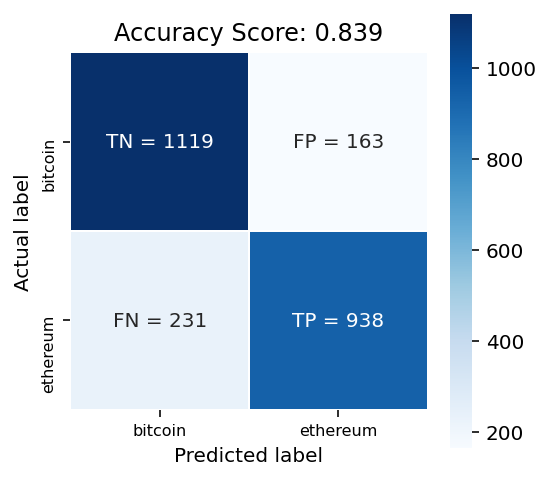

In [29]:
x_test_vect = vect.transform(x_test[COL_NAME].values)
y_pred = lr.predict(x_test_vect)
plot_confusion_matrix(y_test, y_pred)


### ROC Curve

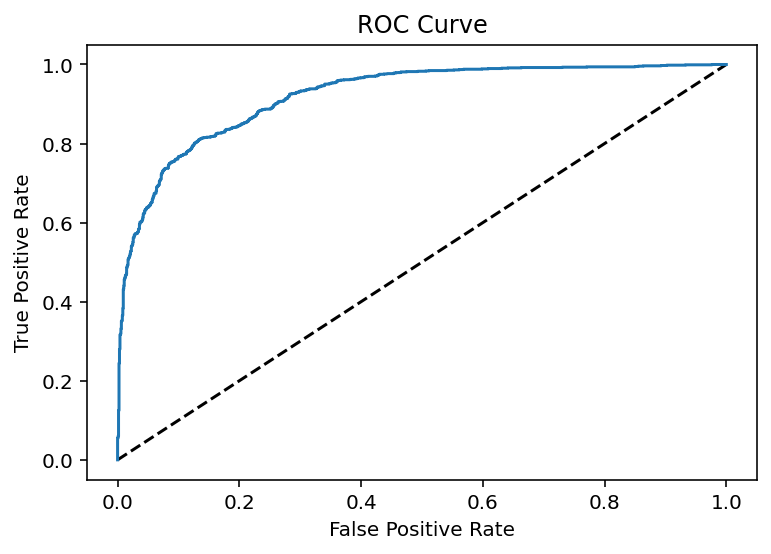

AUC Score: 0.920


In [31]:
plot_roc_curve(lr, x_test_vect, y_test)

### Feature Importances

In [ ]:
coef_df = pd.Series(np.ravel(lr.coef_), index=feat_names).sort_values().to_frame('coefficient')
btc_df_top20 = coef_df.head(20).reset_index().rename(columns={'index': "features"})
eth_df_top20 = coef_df.tail(20).reset_index().rename(columns={'index': "features"})
display(btc_df_top20.head())
display(eth_df_top20.head())

In [21]:
coef_df.reset_index().columns

Index(['index', 'coefficient'], dtype='object')

In [23]:
def plot_coefs(plot_df):
    fig = plt.figure(figsize=(20,15), tight_layout = True)
    my_range=range(0,len(plot_df))

    plt.hlines(y=plot_df['features'], xmin=0,color='darkslategrey',xmax=plot_df['coefficient'],linewidth=3, alpha =0.8)
    plt.scatter(plot_df['coefficient'], my_range,color='darkslategrey',s=80, alpha=1)
    plt.title("Top 20 Most Significant Features based on Strength of Coefficients", fontsize=20, x=0.5,y=1.02)
    plt.xlabel('Coefficient', fontsize=20)
    plt.ylabel('Features',fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.grid()

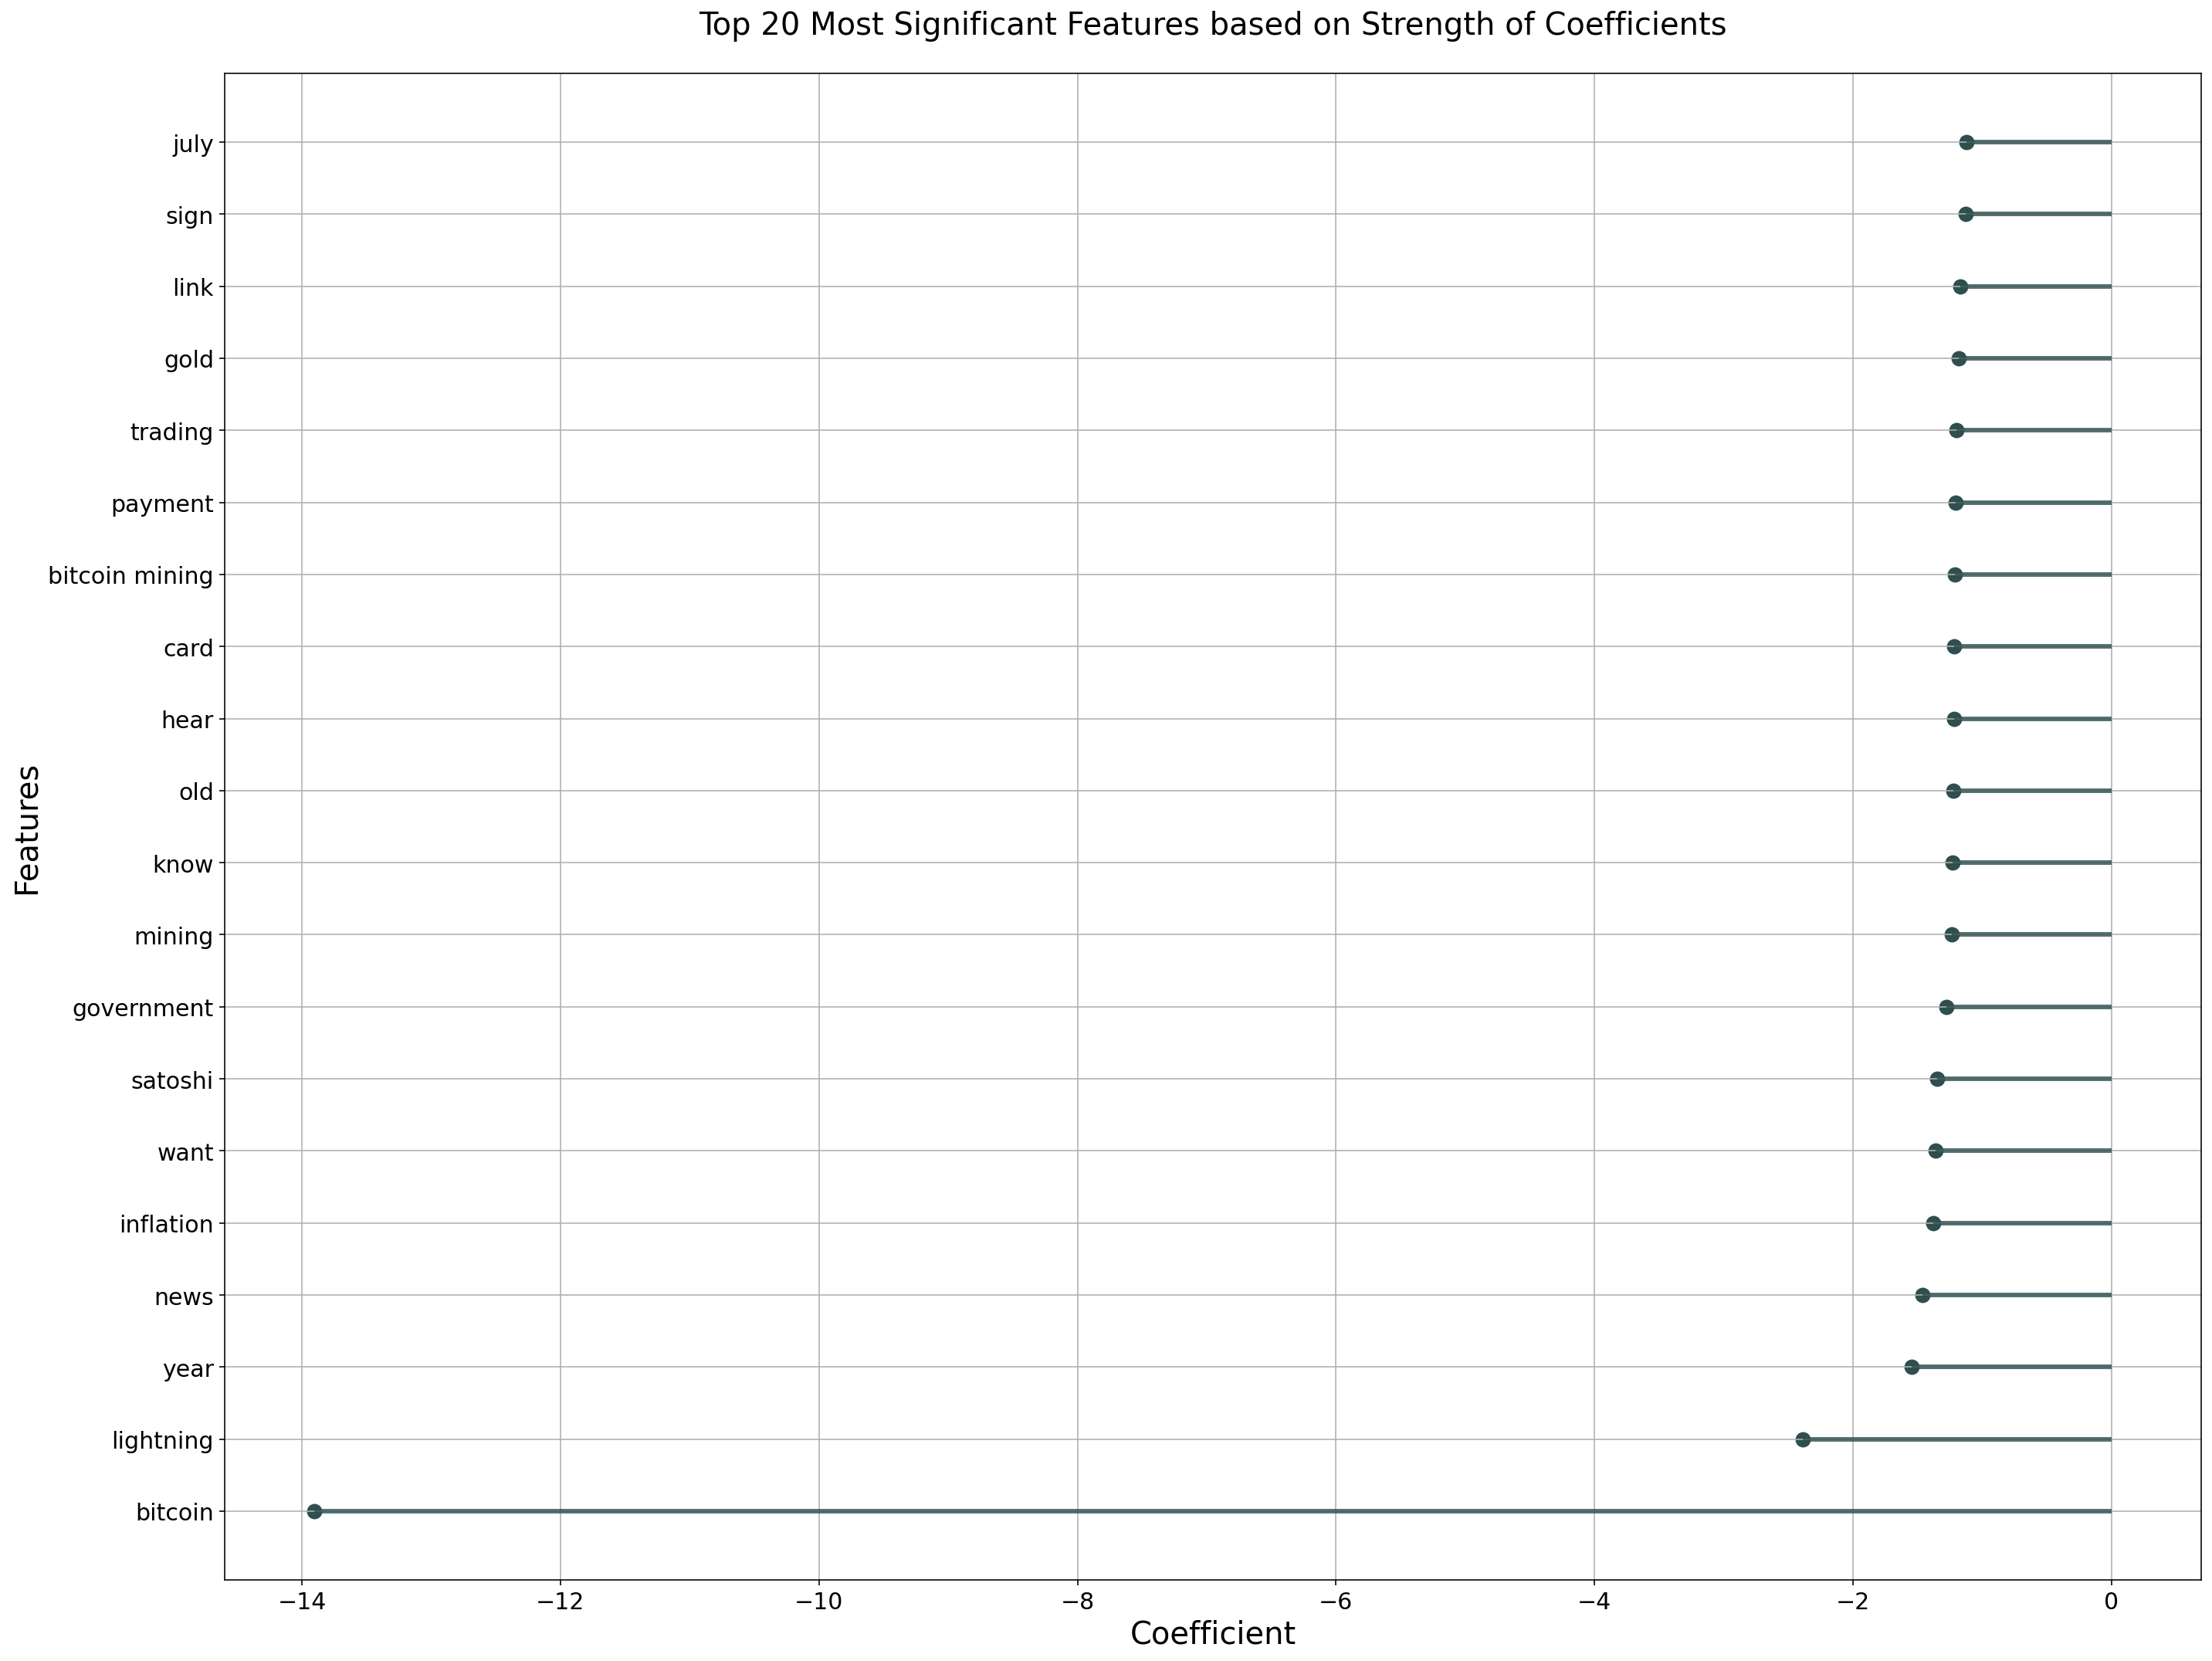

In [24]:
plot_coefs(btc_df_top20)

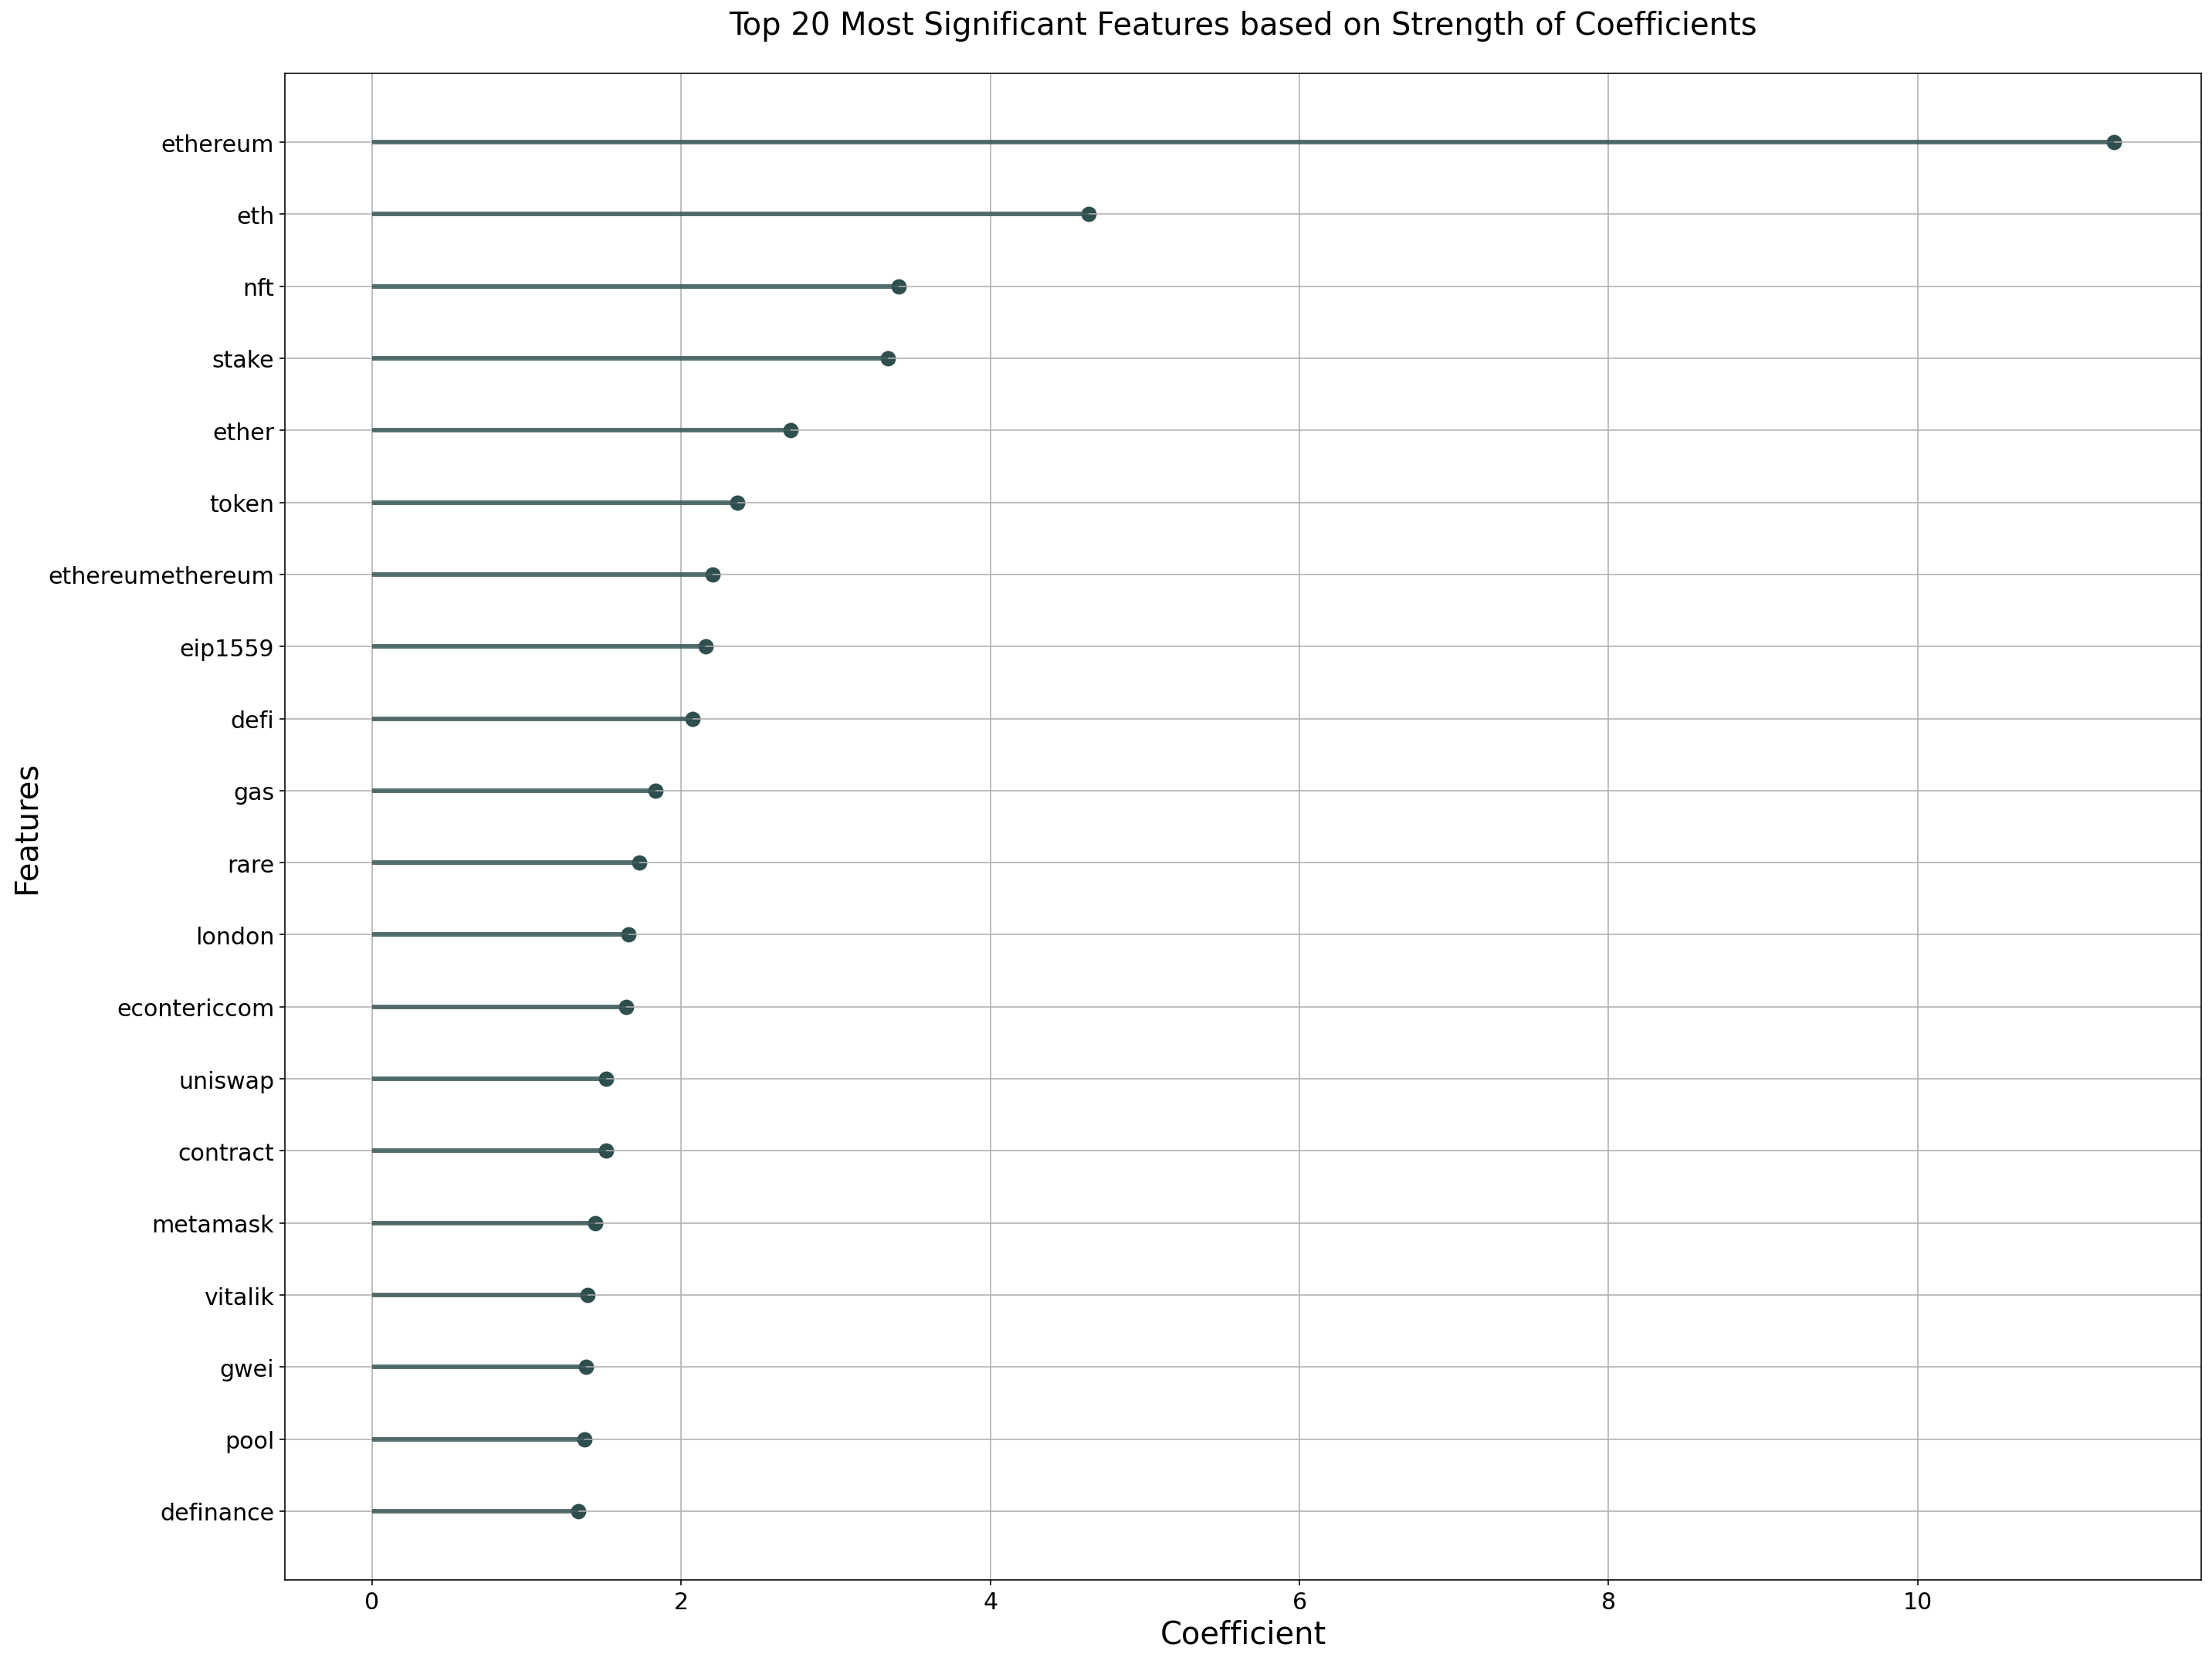

In [25]:
plot_coefs(eth_df_top20)

## Results & Analysis

A total of 12 vectorizer-model combinations were evaluated. The vectorizers considered were  Count Vectorizer with binary=True,  Count Vectorizer with binary=False  and Tfidf Vectorizer. The models considered were Bernoulli & Multinomial Naive Bayes, Support Vector Machine, and Logistic Regression. Evaluation of the combinations was conducted using 2 metrics: accuracy and receiver operating characteristic area under curve (ROC AUC).

For each combination. the text feature was first preprocessed using one of the text vectorizers before being passed into GridSearchCV to find the optimal collection of hyperparameters. Next, with the optimized model, cross validation was done with the train dataset and the model was subsequently tested using the test dataset.

All in all, Tfidf Vectorizer-Logistic Regression with Ngram range( 1,2) is the combination of choice. It had the best test ROC AUC score at 0.9204 and while text accuracy is ~0.4% lower than the best test accuracy score at 83.97% (achieved with Ngram range(1,3)), the tradeoff in test accuracy was worth it for lower computational cost.

The top 3 words that predicted a post to be from the Bitcoin subreddit were ‘bitcoin’, ‘lightning’, and 'year' while the top 3 words that predicted a post to be from the Ethereum subreddit were ‘ethereum’, ‘eth’, and ‘nft’. 


## Next Steps
* Now that we have this classifier, one possible application is in chatbots. \
Here, the chatbot will attempt to identify the topic of the interest based on keywords in the user's message
*Another possible application for such a classifier would be for tagging articles
*Of course, there is also the possibility of expanding the functionality to cover other cryptocurries as well
